In [1]:
# import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load the data
df = pd.read_excel("Random Price Dataset Trial Assignment.xlsx")

In [3]:
df.head()

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
0,2000-01-01,41.0,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,...,NaN,NaN,6833222.0,2649293.0,35239920.0,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,41.0,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,...,NaN,NaN,5647987.0,2787667.0,36716752.0,NaN,NaN,NaN,NaN,NaN
2,2000-03-01,45.0,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,...,NaN,NaN,6721125.0,4692701.0,45144561.0,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,47.0,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,...,NaN,NaN,7169182.0,2565068.0,32240349.0,NaN,NaN,NaN,NaN,NaN
4,2000-05-01,47.0,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,...,NaN,NaN,10466333.0,4671325.0,29351633.0,NaN,NaN,NaN,NaN,NaN


# EDA

In [4]:
df.shape

(276, 50)

In [5]:
df.columns

Index(['Date', 'Domestic Market (Contract) Blow Molding, Low',
       'Spot/Export Blow Molding', 'Spot, Domestic', 'WTISPLC', 'MCOILBRENTEU',
       'GASREGM', 'IMPCH', 'EXPCH', 'PRUBBUSDM', 'WPUFD4111',
       'PCU325211325211', 'PCU32611332611301', 'WPU0915021625',
       'PCU3252132521', 'MHHNGSP', 'WPU072205011', 'PCU32611132611115',
       'PCU32611332611301.1', 'PCU32611132611112', 'WPU0915021622',
       'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ',
       'Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export',
       'India_export', 'Russia_export', 'South_Africa_export', 'Turkey',
       'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export',
       'China_export', 'Australia _import', 'Canada_import', 'Saudi_import',
       'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import',
       'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import',
  

*I see a lot of useless and unwanted columns. I will check the correlation and use other techniques then i will remove the unwnated columns.*

In [6]:
# looking for null values
null=df.isnull().sum()
print(null[null>50])

Spot/Export Blow Molding     91
Spot, Domestic              151
WPU0915021625               144
WPU072205011                161
PCU32611132611115           161
PCU32611332611301.1          72
PCU32611132611112           161
WPU0915021622               143
Australia _export           238
Canada_export               122
Saudi_export                243
Usa_export                  122
India_export                134
Russia_export               168
South_Africa_export         122
Germeny_export               98
United Kingdome_export      123
China_export                168
Australia _import           167
Canada_import               122
Saudi_import                243
Usa_import                  122
India_import                134
Russia_import               168
South_Africa_import         122
Turkey_import               108
Brazil_import               108
Germeny_import               98
United Kingdome_import      122
China_import                168
Japan_import                123
South_ko

All the columns with more than 50 null values.

*Our data has only 276 records , we can remove the columns where the null values are more than 100, and we can fill values in some columns where the number of null values is less.*

In [7]:
df1 = df.dropna(axis=1, thresh=df.shape[0] - 100)

In [8]:
df1.shape

(276, 22)

---
#### Since we have to create Univariate models lets ignore other columns and only focus on `Domestic Market` Variable.

In [9]:
# renaming the target column as y
df = df.rename(columns={'Domestic Market (Contract) Blow Molding, Low': 'y'})

In [10]:
df = df[['Date','y']]
df.head()

,Date,y
0,2000-01-01,41.0
1,2000-02-01,41.0
2,2000-03-01,45.0
3,2000-04-01,47.0
4,2000-05-01,47.0


In [11]:
# checking for duplicate values
df.duplicated().sum()

0

In [12]:
# looking at the skew of the data
df.y.skew()

-0.19174274782101075

In [13]:
# looking for peakedness in data
df.y.kurt()

-0.9299630740194198

The kurtosis value is negative so we can say that ⇨ 
- data has few extreme vales
- the distribution has low concentration of data points around mean
- no much variablitly in the data.

In [14]:
df.dtypes

Date    datetime64[ns]
y              float64
dtype: object

In [15]:
df=df.set_index('Date')

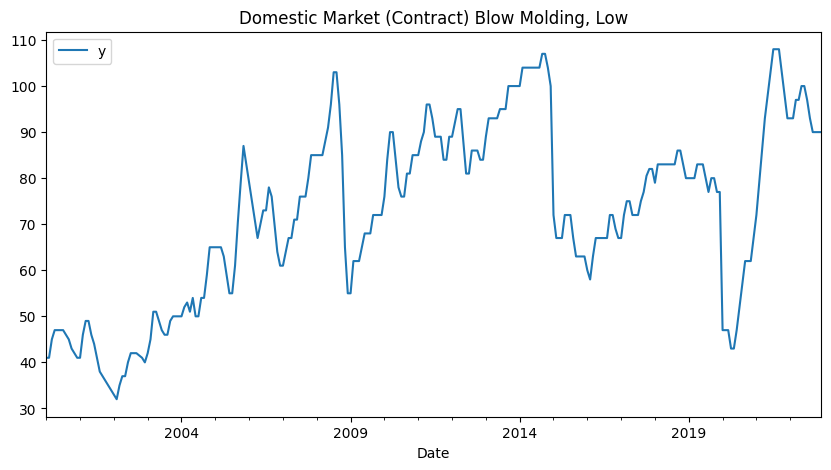

In [16]:
color_pal = sns.color_palette()
df.plot(style='-',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
        
          title='Domestic Market (Contract) Blow Molding, Low')
plt.show()

## Time Series Feature Generation.

In [17]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['dayofweek','quarter','month','year','weekday','season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df, label='y')
features_and_target = pd.concat([X, y], axis=1)

In [18]:
X

,dayofweek,quarter,month,year,weekday,season
Date,,,,,,
2000-01-01,5,1,1,2000,Saturday,Winter
2000-02-01,1,1,2,2000,Tuesday,Winter
2000-03-01,2,1,3,2000,Wednesday,Winter
2000-04-01,5,2,4,2000,Saturday,Spring
2000-05-01,0,2,5,2000,Monday,Spring
...,...,...,...,...,...,...
2022-08-01,0,3,8,2022,Monday,Summer
2022-09-01,3,3,9,2022,Thursday,Summer
2022-10-01,5,4,10,2022,Saturday,Fall


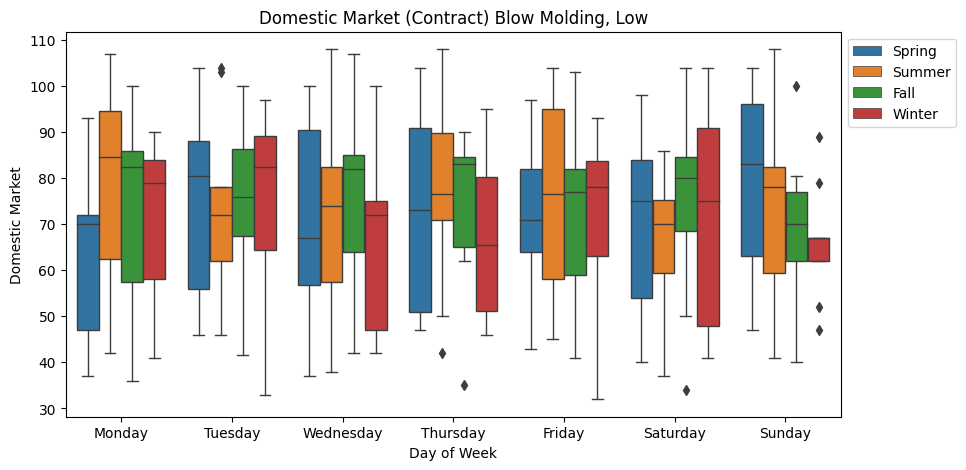

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='y',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Domestic Market (Contract) Blow Molding, Low')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Domestic Market')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### DECOMPOSITION.

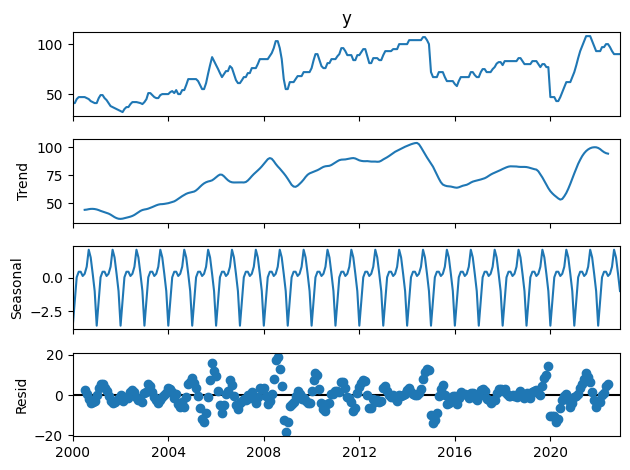

In [20]:
# Decomposing the time series
result = seasonal_decompose(y, model='additive')
result.plot()
plt.show()

Lets understand this decompostion char.
- what is trend?
⇨ The trend component represents the long-term movement or direction of the data. 
- what is seasonality?
⇨ The seasonality component captures patterns that repeat over fixed, known intervals, such as daily, weekly, monthly, or yearly.
- what is Residuals?
⇨ The residual component, also known as the error or noise component, represents the random and irregular fluctuations in the data that cannot be attributed to the trend or seasonality.
<br>



- *we can cleary see there is no trend.*
- *There is seasonality.*

In [21]:
# Performing Augmented Dickey-Fuller test to check stationarity.


from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Perform Augmented Dickey-Fuller test on the time series data
adf_test(y)


ADF Statistic: -2.2380451821864122
p-value: 0.192728048921545
Critical Values:
	1%: -3.4547128138328875
	5%: -2.8722649771800155
	10%: -2.5724850011573914


--- 
- Q. What is Stationarity?
⇨ Stationarity refers to a property where the statistical properties of the data remain constant over time.

##### Finding after performing ADF test.
1. The p value is 0.19 which is greater than 0.05, so we don't have enough evidence to reject null hyphothesis which is that the time series is non-stationary.
2. The test statistic is -2.2380451821864122. Comparing it with the critical values (-3.4547128138328875, -2.8722649771800155, and -2.5724850011573914), we see that the test statistic is greater than all of them. This indicates that the time series may not be stationary.
3. In summary, based on the results, the time series may exhibit non-stationary behavior. 

---
Since our data is non stationary we have to make it stationary. Applying differncing to make stationary.

In [22]:
differenced_series = y.diff().dropna()

#### Building ACF AND PACF plots.

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

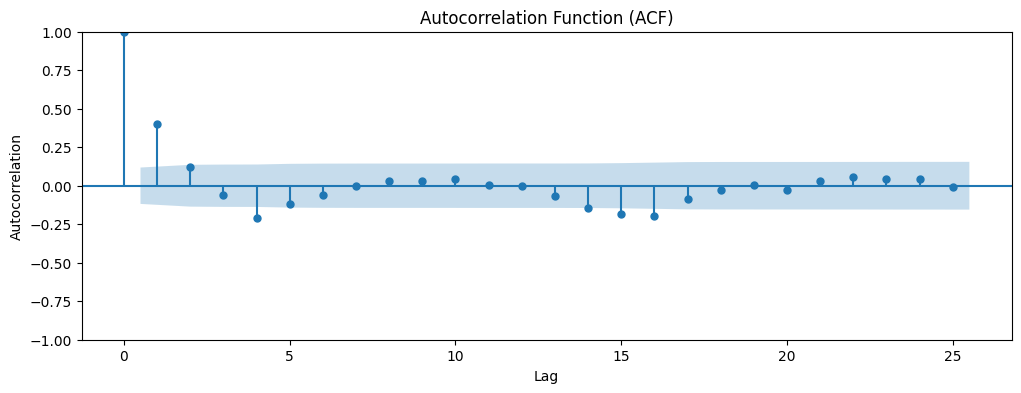

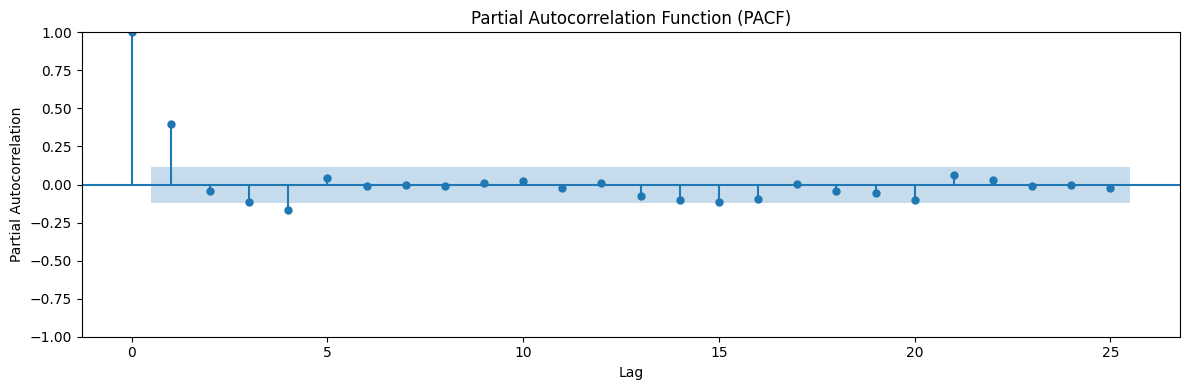

In [24]:
# Plot ACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(differenced_series, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(differenced_series, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

- If the ACF plot shows a significant spike at lag k and a gradual decline afterward, it suggests a potential MA component of order q=k.
- If the ACF plot cuts off abruptly after a certain lag k, it indicates that the series might require differencing (d > 0) to achieve stationarity.
- If the PACF plot shows a significant spike at lag k and a gradual decline afterward, it suggests a potential AR component of order p=k.

# Model Building.

### Arima Model

In [25]:
import statsmodels.api as sm

In [26]:
adf_test(differenced_series)

ADF Statistic: -9.399522336217295
p-value: 6.241891331473897e-16
Critical Values:
	1%: -3.4547128138328875
	5%: -2.8722649771800155
	10%: -2.5724850011573914


#### Splitting the data.

In [27]:
train = differenced_series.iloc[0:263]
test = differenced_series.iloc[263:276]

In [28]:
print(test)

Date
2022-01-01    0.0
2022-02-01    0.0
2022-03-01    4.0
2022-04-01    0.0
2022-05-01    3.0
2022-06-01    0.0
2022-07-01   -3.0
2022-08-01   -4.0
2022-09-01   -3.0
2022-10-01    0.0
2022-11-01    0.0
2022-12-01    0.0
Name: y, dtype: float64


In [29]:
model = sm.tsa.ARIMA(train, order=(15, 0, 14),freq='MS')
arima_model = model.fit()

C:\Users\91775\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91775\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91775\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\91775\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum 

In [30]:
yhat = arima_model.predict(start='2022-01-01', end='2022-12-01')
yhat

2022-01-01   -3.103741
2022-02-01    1.505800
2022-03-01    1.790250
2022-04-01    1.868163
2022-05-01    0.563578
2022-06-01   -3.249813
2022-07-01   -2.841879
2022-08-01   -2.939739
2022-09-01    0.442403
2022-10-01    0.451271
2022-11-01    0.086437
2022-12-01    1.999319
Freq: MS, Name: predicted_mean, dtype: float64

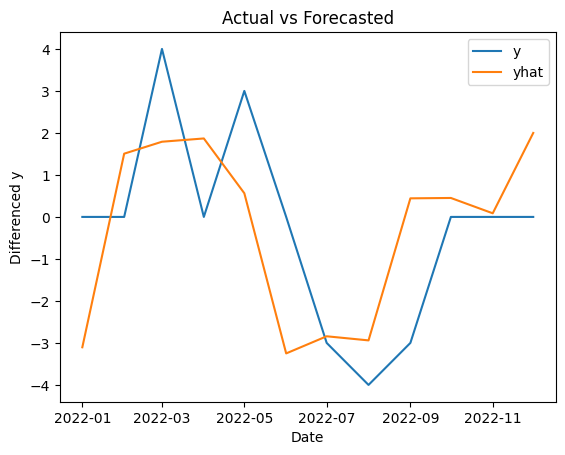

In [31]:
# Plot the forecast with the actuals

# Plotting the line graphs
plt.plot(test, label='y')
plt.plot(yhat, label='yhat')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Differenced y')
plt.title('Actual vs Forecasted')

# Add a legend to differentiate the two series
plt.legend();

In [32]:
undifferenced_series = differenced_series.cumsum()

# Add back the initial value to get the original series
original_series = 41.0 + undifferenced_series
temp = yhat.cumsum()
real_forecasted_values = 93.0 + temp

In [33]:
real_forecasted_values

2022-01-01    89.896259
2022-02-01    91.402059
2022-03-01    93.192310
2022-04-01    95.060473
2022-05-01    95.624051
2022-06-01    92.374238
2022-07-01    89.532359
2022-08-01    86.592620
2022-09-01    87.035023
2022-10-01    87.486294
2022-11-01    87.572731
2022-12-01    89.572050
Freq: MS, Name: predicted_mean, dtype: float64

#### Evaluating the model.

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def RMSE(y_true,y_pred)-> float :
    return np.sqrt(mean_squared_error(y_true, y_pred))

def MAPE(y_true,y_pred) -> float:
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def R2(y_true,y_pred) -> float:
    return r2_score(y_true, y_pred)

def MAE(y_true,y_pred) -> float:
    return mean_absolute_error(y_true, y_pred)
    

In [35]:
arima_RMSE = RMSE(original_series.iloc[263:276],real_forecasted_values)
arima_MAPE = MAPE(original_series.iloc[263:276],real_forecasted_values)
arima_R2 = R2(original_series.iloc[263:276],real_forecasted_values)
arima_MAE = MAE(original_series.iloc[263:276],real_forecasted_values)

In [36]:
print("The Metrics For ARIMA Mode :\n")
print("RMSE :", arima_RMSE)
print("MAPE :", arima_MAPE)
print("R2   :", arima_R2)
print("MAE  :", arima_MAE)

The Metrics For ARIMA Mode :

RMSE : 4.337365083414331
MAPE : 3.902532914114455
R2   : -0.36269314125872243
MAE  : 3.7216277512832376


### LSTM

In [37]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [38]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(y.values.reshape(-1, 1))

In [39]:
train_data = scaled_data[:263]
test_data = scaled_data[263:]

In [40]:
# Convert the data into sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10  # Choose an appropriate window size
train_X, train_y = create_sequences(train_data, window_size)
test_X, test_y = create_sequences(test_data, window_size)


In [41]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [42]:
# Train the model
model.fit(train_X, train_y, epochs=50, batch_size=32)

Epoch 1/50
8/8 [==============================] - 2s 6ms/step - loss: 0.2933
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.1838
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0300
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0235
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0176
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0187
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0168
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0168
Epoch 10/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 11/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0158
Epoch 12/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0155
Epoch 13/50
8/8 [==============================] - 0s 5ms/step - loss: 0.

In [43]:
# Evaluate the model
loss = model.evaluate(test_X, test_y)

1/1 [==============================] - 0s 260ms/step - loss: 0.0069


In [44]:
# Make predictions
predictions = model.predict(test_X)

1/1 [==============================] - 0s 191ms/step


In [45]:
# Rescale the predictions to the original scale
predictions = scaler.inverse_transform(predictions)

In [46]:
predictions

array([[84.92376 ],
       [83.36343 ],
       [82.971344]], dtype=float32)

In [47]:
# Convert the predictions to a pandas Series with appropriate index
predicted_series = pd.Series(predictions.flatten(), index=y.index[273:])

In [48]:
predicted_series

Date
2022-10-01    84.923759
2022-11-01    83.363426
2022-12-01    82.971344
dtype: float32

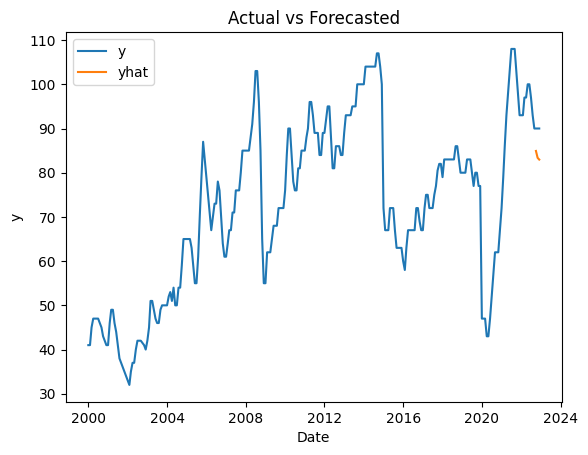

In [49]:
# Plot the forecast with the actuals

# Plotting the line graphs
plt.plot(y, label='y')
plt.plot(predicted_series, label='yhat')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('y')
plt.title('Actual vs Forecasted')

# Add a legend to differentiate the two series
plt.legend();

In [50]:
LSTM_RMSE = RMSE(y.iloc[273:],predicted_series)
LSTM_MAPE = MAPE(y.iloc[273:],predicted_series)
LSTM_R2 = R2(y.iloc[273:],predicted_series)
LSTM_MAE = MAE(y.iloc[273:],predicted_series)

In [51]:
print("The Metrics For LSTM Mode :\n")
print("RMSE :", LSTM_RMSE)
print("MAPE :", LSTM_MAPE)
print("R2   :", LSTM_R2)
print("MAE  :", LSTM_MAE)

The Metrics For LSTM Mode :

RMSE : 6.303817228583498
MAPE : 6.941285309968172
R2   : 0.0
MAE  : 6.2471567789713545


### Lazy Predict

In [52]:
from lazypredict.Supervised import LazyRegressor

In [53]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

In [54]:
# lets use this dataframe
df1.head()

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,...,PCU3252132521,MHHNGSP,PCU32611332611301.1,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Turkey,Brazil,France_export,Germeny_export,France_import,Germeny_import
0,2000-01-01,41.00,NaN,27.18,25.51,1.29,6902.10,863.10,29.21,135.00,...,NaN,2.42,106.30,139.40,61808.00,10352529.00,29327224.00,NaN,35239920.00,NaN
1,2000-02-01,41.00,NaN,29.35,27.78,1.38,6584.40,972.70,33.39,136.00,...,NaN,2.66,105.60,141.70,450675.00,8844172.00,33506035.00,NaN,36716752.00,NaN
2,2000-03-01,45.00,NaN,29.89,27.49,1.52,6424.10,1330.50,30.94,136.00,...,NaN,2.79,106.10,146.30,671273.00,14091209.00,35764935.00,NaN,45144561.00,NaN
3,2000-04-01,47.00,NaN,25.74,22.76,1.47,7070.50,1227.50,31.93,137.30,...,NaN,3.04,106.90,151.40,73178.00,14097518.00,24713057.00,NaN,32240349.00,NaN
4,2000-05-01,47.00,NaN,28.78,27.74,1.49,7850.20,1526.30,31.20,138.20,...,NaN,3.59,106.30,155.60,211953.00,16762995.00,28413226.00,NaN,29351633.00,NaN


##### Filling NA values with the respective mean value.

In [58]:
for col in df1.columns:
    df1[col] = df1[col].fillna(df1[col].mean())

In [71]:
# splitting the data
X_train = df1[df1.Date<'2022-01-01'].drop('Domestic Market (Contract) Blow Molding, Low',axis =1)
y_train = df1[df1.Date<'2022-01-01']['Domestic Market (Contract) Blow Molding, Low']

In [72]:
X_test = df1[df1.Date>'2022-01-01'].drop('Domestic Market (Contract) Blow Molding, Low',axis =1)
y_test = df1[df1.Date>'2022-01-01']['Domestic Market (Contract) Blow Molding, Low']

In [73]:
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████| 42/42 [00:03<00:00, 11.49it/s]


In [74]:
print(models)


                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
Lars                                    110939.98 -122031.88 1349.60   
GaussianProcessRegressor                   537.58    -589.23   93.86   
KernelRidge                                243.72    -265.99   63.13   
MLPRegressor                               188.77    -205.55   55.52   
DummyRegressor                              33.83     -35.11   23.22   
QuantileRegressor                           32.12     -33.24   22.61   
OrthogonalMatchingPursuit                   29.94     -30.84   21.80   
PassiveAggressiveRegressor                  24.30     -24.63   19.56   
OrthogonalMatchingPursuitCV                 21.18     -21.20   18.20   
GammaRegressor                              21.17     -21.18   18.20   
SVR                                         18.69     -18.45   17.04   
NuSVR                                       18.63     -18.40   1

---